/Users/arthurostrauss/Library/CloudStorage/OneDrive-NationalUniversityofSingapore/Coding_projects/Quantum_Optimal_Control/rl_qoc/helpers/__init__.py:9: UserWarning: pulse_utils is not available
  warnings.warn("pulse_utils is not available")
/Users/arthurostrauss/Library/CloudStorage/OneDrive-NationalUniversityofSingapore/Coding_projects/Quantum_Optimal_Control/.venv/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/Users/arthurostrauss/Library/CloudStorage/OneDrive-NationalUniversityofSingapore/Cod

Circuit context


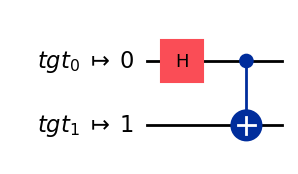

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from q_env_config import (
    get_circuit_context,
    apply_parametrized_circuit,
    custom_instruction_durations,
)
from rl_qoc import (
    QuantumEnvironment,
    ContextAwareQuantumEnvironment,
    RescaleAndClipAction,
)
from rl_qoc.helpers import get_q_env_config
import os

config_file_name = "/q_env_gate_config.yml"
config_file_address = os.getcwd() + config_file_name
q_env_config = get_q_env_config(
    config_file_address,
    apply_parametrized_circuit,
)
q_env_config.parametrized_circuit_kwargs = {
    "target": q_env_config.target,
    "backend": q_env_config.backend,
}

default_num_qubits = 2
q_env_config.instruction_durations_dict = custom_instruction_durations(
    q_env_config.backend.num_qubits if q_env_config.backend is not None else default_num_qubits
)
circuit_context = get_circuit_context(q_env_config.backend, q_env_config.physical_qubits)

circuit_context.draw("mpl")

In [2]:
from qiskit.visualization import plot_circuit_layout, plot_gate_map

if q_env_config.backend is not None and circuit_context.layout is not None:
    fig = plot_circuit_layout(circuit_context, q_env_config.backend_config.backend, view="physical")
    print(
        "Selected backend:",
        q_env_config.backend.name,
        "backend version",
        q_env_config.backend_config.backend.version,
    )
elif q_env_config.backend is not None and q_env_config.backend.coupling_map.size() != 0:
    fig = plot_gate_map(q_env_config.backend)
    print(
        "Selected backend:",
        q_env_config.backend.name,
        "backend version",
        q_env_config.backend_config.backend.version,
    )
else:
    fig = None
    print("No backend selected, cannot plot circuit layout or gate map")

fig

No backend selected, cannot plot circuit layout or gate map


In [3]:
use_context = False
if use_context:
    q_env = ContextAwareQuantumEnvironment(
        q_env_config, circuit_context, training_steps_per_gate=250
    )
else:
    q_env = QuantumEnvironment(q_env_config)
rescaled_env = RescaleAndClipAction(q_env, -1.0, 1.0)

/Users/arthurostrauss/Library/CloudStorage/OneDrive-NationalUniversityofSingapore/Coding_projects/Quantum_Optimal_Control/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:236: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
/Users/arthurostrauss/Library/CloudStorage/OneDrive-NationalUniversityofSingapore/Coding_projects/Quantum_Optimal_Control/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:306: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


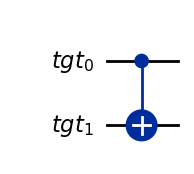

In [7]:
q_env.baseline_circuit.draw("mpl", style="iqp")

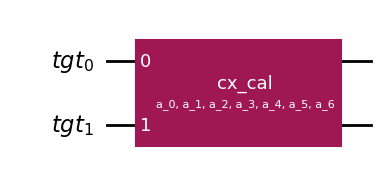

In [6]:
q_env.circuit.draw("mpl", style="iqp")

In [8]:
q_env.target.layout

Layout({
0: <Qubit register=(2, "tgt"), index=0>,
1: <Qubit register=(2, "tgt"), index=1>
})

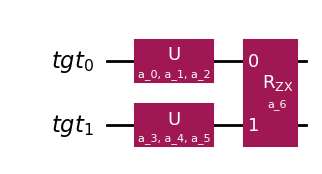

In [9]:
q_env.config.backend_config.custom_transpile(q_env.circuits[0], scheduling=False).draw("mpl")

In [10]:
from rl_qoc import PPOConfig
from pathlib import Path

# Change the file_name to the name of the agent configuration file and specify the file location
file_name = "agent_config.yaml"
file_location = file_name

agent_config = PPOConfig.from_yaml(file_location)

In [11]:
from rl_qoc.agent import CustomPPO, TrainingConfig, TrainFunctionSettings, TotalUpdates

ppo_agent = CustomPPO(agent_config, rescaled_env)
total_updates = 200
target_fidelities = [0.9]
lookback_window = 20
anneal_learning_rate = False

ppo_config = TrainingConfig(
    TotalUpdates(total_updates),
    target_fidelities,
    lookback_window,
    anneal_learning_rate,
)
train_settings = TrainFunctionSettings(
    plot_real_time=True,
    print_debug=False,
    num_prints=10,
    hpo_mode=False,
    clear_history=False,
)

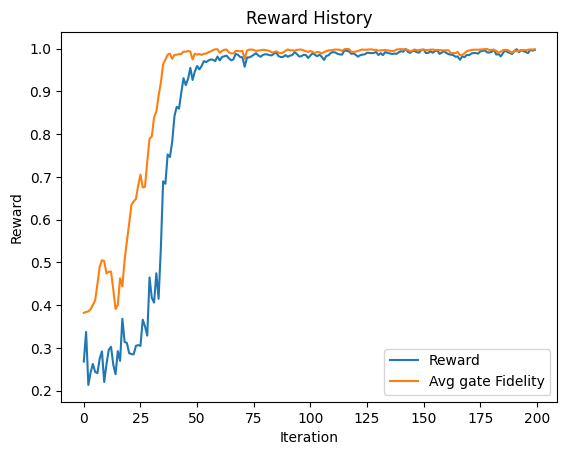

{'avg_reward': [0.26828377448013485,
  0.3377023488661297,
  0.21363049126434352,
  0.24305443585238362,
  0.26270742520628315,
  0.2440728953659294,
  0.24127124295057983,
  0.2750225132699188,
  0.2921221923574654,
  0.22043463853086104,
  0.2620251870191306,
  0.29583879678771124,
  0.3028029810862052,
  0.2611132288855741,
  0.23869094446857006,
  0.29266169630941674,
  0.26987177901327775,
  0.36845004412092375,
  0.3141433208018715,
  0.3117429375107933,
  0.2879871041741705,
  0.28583560787552365,
  0.28513815217236044,
  0.30505953377866707,
  0.30671166162279206,
  0.3048077093323834,
  0.36631041203747305,
  0.3506071913941369,
  0.32905747650944434,
  0.4651011152504152,
  0.417292710776599,
  0.40611955347961537,
  0.47473670950711233,
  0.41509149568805215,
  0.5335844395394382,
  0.6898147351286498,
  0.684052980153585,
  0.752651667356098,
  0.7466258924987265,
  0.7818182613887774,
  0.8420156328177331,
  0.8641882136300766,
  0.8596259867035073,
  0.896527891719088,
  

<Figure size 640x480 with 0 Axes>

In [12]:
%matplotlib inline
ppo_agent.train(ppo_config, train_settings)

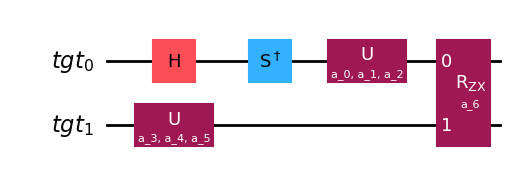

In [12]:
q_env.pubs[4].circuit.draw("mpl")

In [17]:
idx = 0
q_env.config.reward.fiducials

[(Pauli('IX'),
  [SparsePauliOp(['XX'],
                 coeffs=[0.75+0.j])]),
 (Pauli('IY'),
  [SparsePauliOp(['XY'],
                 coeffs=[1.25+0.j])]),
 (Pauli('IZ'),
  [SparsePauliOp(['IZ'],
                 coeffs=[0.5+0.j])]),
 (Pauli('XI'),
  [SparsePauliOp(['XI'],
                 coeffs=[1.+0.j])]),
 (Pauli('XX'),
  [SparsePauliOp(['IX'],
                 coeffs=[0.75+0.j])]),
 (Pauli('XY'),
  [SparsePauliOp(['IY'],
                 coeffs=[0.75+0.j])]),
 (Pauli('XZ'),
  [SparsePauliOp(['XZ'],
                 coeffs=[0.5+0.j])]),
 (Pauli('YI'),
  [SparsePauliOp(['YZ'],
                 coeffs=[0.25+0.j])]),
 (Pauli('YX'),
  [SparsePauliOp(['ZY'],
                 coeffs=[1.25+0.j])]),
 (Pauli('YY'),
  [SparsePauliOp(['ZX'],
                 coeffs=[-0.5+0.j])]),
 (Pauli('YZ'),
  [SparsePauliOp(['YI'],
                 coeffs=[1.5+0.j])]),
 (Pauli('ZI'),
  [SparsePauliOp(['ZZ'],
                 coeffs=[0.75+0.j])]),
 (Pauli('ZX'),
  [SparsePauliOp(['YY'],
                 

In [18]:
q_env.config.execution_config.current_n_reps

1

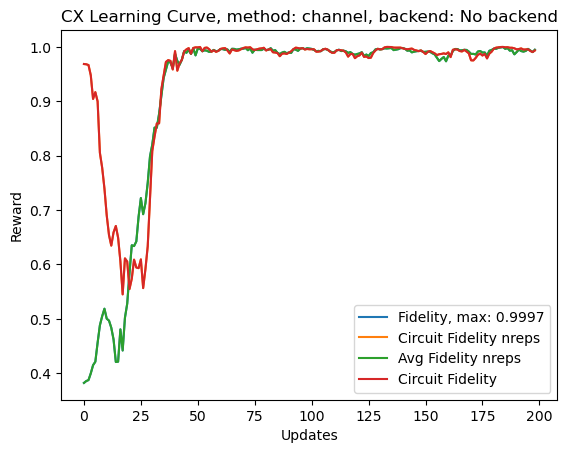

In [19]:
# Plotting the learning curve

reward_history = np.array(q_env.reward_history)
mean_rewards = np.mean(reward_history, axis=-1)
max_mean = int(np.max(mean_rewards) * 1e4) / 1e4

# plt.plot(mean_rewards, label=f"Mean Batch Rewards, max: {max_mean}")
plt.plot(
    q_env.fidelity_history,
    label=f"Fidelity, max: {int(np.max(q_env.fidelity_history) * 1e4) / 1e4}",
)
plt.plot(q_env.circuit_fidelity_history_nreps, label="Circuit Fidelity nreps")
plt.plot(q_env.avg_fidelity_history_nreps, label="Avg Fidelity nreps")
plt.plot(q_env.circuit_fidelity_history, label="Circuit Fidelity")
plt.xlabel("Updates")
plt.ylabel("Reward")
plt.title(
    f"{q_env.target.gate.name.upper()} Learning Curve, method: {q_env.config.reward_method},"
    f" backend: {q_env_config.backend.name if q_env_config.backend is not None else 'No backend'}"
)
plt.legend()
plt.show()

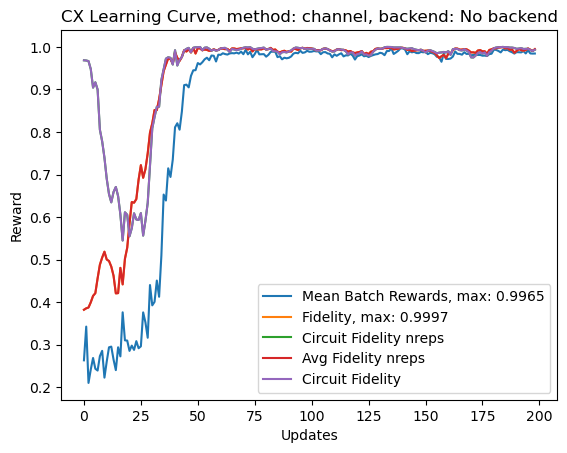

In [20]:
# Plotting the learning curve

reward_history = np.array(q_env.reward_history)
mean_rewards = np.mean(reward_history, axis=-1)
max_mean = int(np.max(mean_rewards) * 1e4) / 1e4

plt.plot(mean_rewards, label=f"Mean Batch Rewards, max: {max_mean}")
plt.plot(
    q_env.fidelity_history,
    label=f"Fidelity, max: {int(np.max(q_env.fidelity_history) * 1e4) / 1e4}",
)
plt.plot(q_env.circuit_fidelity_history_nreps, label="Circuit Fidelity nreps")
plt.plot(q_env.avg_fidelity_history_nreps, label="Avg Fidelity nreps")
plt.plot(q_env.circuit_fidelity_history, label="Circuit Fidelity")
plt.xlabel("Updates")
plt.ylabel("Reward")
plt.title(
    f"{q_env.target.gate.name.upper()} Learning Curve, method: {q_env.config.reward_method},"
    f" backend: {q_env_config.backend.name if q_env_config.backend is not None else 'No backend'}"
)
plt.legend()
plt.show()

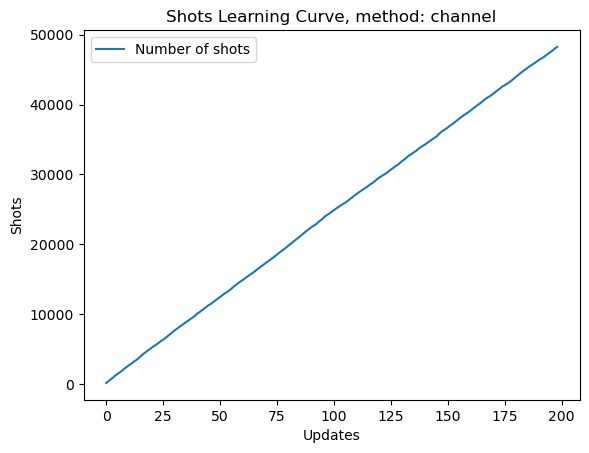

In [21]:
plt.plot(np.cumsum(q_env.total_shots), label="Number of shots")
plt.xlabel("Updates")
plt.ylabel("Shots")
plt.title(f"Shots Learning Curve, method: {q_env.config.reward_method}")
plt.legend()

In [22]:
convergence_iteration = 60
print(
    "Number of shots required for convergence:",
    np.cumsum(q_env.total_shots[:convergence_iteration]),
)

Number of shots required for convergence: [  199.48304181   456.26847096   702.25463965   960.19506141
  1249.1858249   1476.60339694  1717.41187088  1959.68563224
  2249.61109902  2483.8456479   2713.68837634  2964.25287324
  3206.36611845  3420.47937296  3667.93082907  3988.91432274
  4275.57862581  4505.26680702  4764.95698956  5012.74865043
  5248.38944032  5463.82803876  5681.23109945  5919.48907725
  6178.58139951  6380.31464138  6625.7496533   6900.44886278
  7170.21051271  7429.32632421  7695.77080048  7939.41966824
  8163.26754712  8405.91137646  8667.26374594  8882.46165793
  9093.46187165  9351.86309364  9548.07257852  9816.2084249
 10114.31304764 10325.33465993 10573.87132477 10831.98209785
 11087.0821258  11319.8933585  11511.03689176 11756.47190368
 12001.83730725 12227.88717642 12508.23853497 12740.99767965
 12978.22147564 13186.91270558 13416.83101128 13678.56401069
 13970.40572995 14218.0076915  14459.18623342 14713.5149908 ]


In [23]:
np.cumsum(q_env.hardware_runtime)

array([0.00043886, 0.00100379, 0.00154496, 0.00211243, 0.00274821,
       0.00324853, 0.00377831, 0.00431131, 0.00494914, 0.00546446,
       0.00597011, 0.00652136, 0.00705401, 0.00752505, 0.00806945,
       0.00877561, 0.00940627, 0.00991159, 0.01048291, 0.01102805,
       0.01154646, 0.01202042, 0.01249871, 0.01302288, 0.01359288,
       0.01403669, 0.01457665, 0.01518099, 0.01577446, 0.01634452,
       0.0169307 , 0.01746672, 0.01795919, 0.01849301, 0.01906798,
       0.01954142, 0.02000562, 0.0205741 , 0.02100576, 0.02159566,
       0.02225149, 0.02271574, 0.02326252, 0.02383036, 0.02439158,
       0.02490377, 0.02532428, 0.02586424, 0.02640404, 0.02690135,
       0.02751812, 0.02803019, 0.02855209, 0.02901121, 0.02951703,
       0.03009284, 0.03073489, 0.03127962, 0.03181021, 0.03236973,
       0.03283928, 0.03337728, 0.03387752, 0.03441012, 0.03490685,
       0.03538374, 0.03597502, 0.03650957, 0.03703579, 0.03756575,
       0.03814029, 0.03866421, 0.03913412, 0.0396761 , 0.04022

In [17]:
from qiskit.quantum_info import average_gate_fidelity
from qiskit.quantum_info import Operator

print(
    "Fidelity of the final circuit:",
    q_env.target.gate_fidelity(
        q_env.circuits[0].assign_parameters(q_env.optimal_action).decompose()
    ),
)

Fidelity of the final circuit: 0.9976945714464932


In [18]:
q_env.mean_action

array([ 0.06219854, -0.20697463,  0.22336991, -0.03119394,  0.10654871,
        0.04338922,  0.07484066], dtype=float32)

In [25]:
q_env.config.reward.fiducials

[(Pauli('IX'),
  [SparsePauliOp(['XX'],
                 coeffs=[0.75+0.j])]),
 (Pauli('IY'),
  [SparsePauliOp(['XY'],
                 coeffs=[1.25+0.j])]),
 (Pauli('IZ'),
  [SparsePauliOp(['IZ'],
                 coeffs=[0.5+0.j])]),
 (Pauli('XI'),
  [SparsePauliOp(['XI'],
                 coeffs=[1.+0.j])]),
 (Pauli('XX'),
  [SparsePauliOp(['IX'],
                 coeffs=[0.75+0.j])]),
 (Pauli('XY'),
  [SparsePauliOp(['IY'],
                 coeffs=[0.75+0.j])]),
 (Pauli('XZ'),
  [SparsePauliOp(['XZ'],
                 coeffs=[0.5+0.j])]),
 (Pauli('YI'),
  [SparsePauliOp(['YZ'],
                 coeffs=[0.25+0.j])]),
 (Pauli('YX'),
  [SparsePauliOp(['ZY'],
                 coeffs=[1.25+0.j])]),
 (Pauli('YY'),
  [SparsePauliOp(['ZX'],
                 coeffs=[-0.5+0.j])]),
 (Pauli('YZ'),
  [SparsePauliOp(['YI'],
                 coeffs=[1.5+0.j])]),
 (Pauli('ZI'),
  [SparsePauliOp(['ZZ'],
                 coeffs=[0.75+0.j])]),
 (Pauli('ZX'),
  [SparsePauliOp(['YY'],
                 

In [31]:
q_env.config.reward.full_fiducials

[(<qiskit.circuit.quantumcircuit.QuantumCircuit at 0x38156b010>,
  [SparsePauliOp(['XX'],
                 coeffs=[-0.75+0.j]),
   SparsePauliOp(['YY'],
                 coeffs=[-0.75+0.j])]),
 (<qiskit.circuit.quantumcircuit.QuantumCircuit at 0x385e0ae90>,
  [SparsePauliOp(['XX'],
                 coeffs=[-0.75+0.j]),
   SparsePauliOp(['YY'],
                 coeffs=[0.75+0.j])]),
 (<qiskit.circuit.quantumcircuit.QuantumCircuit at 0x38648dcd0>,
  [SparsePauliOp(['XX'],
                 coeffs=[0.75+0.j]),
   SparsePauliOp(['YY'],
                 coeffs=[0.75+0.j])]),
 (<qiskit.circuit.quantumcircuit.QuantumCircuit at 0x38537a350>,
  [SparsePauliOp(['XX'],
                 coeffs=[0.75+0.j]),
   SparsePauliOp(['YY'],
                 coeffs=[-0.75+0.j])]),
 (<qiskit.circuit.quantumcircuit.QuantumCircuit at 0x3858faa90>,
  [SparsePauliOp(['XY'],
                 coeffs=[-1.25+0.j]),
   SparsePauliOp(['YX'],
                 coeffs=[-0.5+0.j])]),
 (<qiskit.circuit.quantumcircuit.Quantum

In [ ]:
0
1
+
-
=
-y

In [32]:
q_env.config.reward.fiducials_indices

[((3, 1), [(1, 1), (2, 2)]),
 ((3, 0), [(1, 1), (2, 2)]),
 ((2, 1), [(1, 1), (2, 2)]),
 ((2, 0), [(1, 1), (2, 2)]),
 ((5, 0), [(2, 1), (1, 2)]),
 ((5, 1), [(2, 1), (1, 2)]),
 ((4, 0), [(2, 1), (1, 2)]),
 ((4, 1), [(2, 1), (1, 2)]),
 ((1, 0), [(0, 0)]),
 ((0, 0), [(0, 0)]),
 ((0, 1), [(0, 0)]),
 ((1, 1), [(0, 0)]),
 ((0, 2), [(0, 1)]),
 ((1, 3), [(0, 1)]),
 ((1, 2), [(0, 1)]),
 ((0, 3), [(0, 1)]),
 ((2, 2), [(1, 0)]),
 ((3, 2), [(1, 0)]),
 ((3, 3), [(1, 0)]),
 ((2, 3), [(1, 0)]),
 ((4, 3), [(2, 0)]),
 ((4, 2), [(2, 0)]),
 ((5, 3), [(2, 0)]),
 ((5, 2), [(2, 0)]),
 ((1, 5), [(0, 2)]),
 ((0, 4), [(0, 2)]),
 ((0, 5), [(0, 2)]),
 ((1, 4), [(0, 2)]),
 ((3, 4), [(2, 0)]),
 ((2, 5), [(2, 0)]),
 ((2, 4), [(2, 0)]),
 ((3, 5), [(2, 0)]),
 ((4, 4), [(1, 0)]),
 ((5, 4), [(1, 0)]),
 ((5, 5), [(1, 0)]),
 ((4, 5), [(1, 0)])]

In [19]:
q_env.optimal_action

array([ 0.05038877, -0.17842805,  0.20412986, -0.03584178,  0.06700793,
       -0.05188625,  0.00070569], dtype=float32)

In [ ]:
q_env.std_action

In [ ]:
ppo_agent.training_results["std_action"]

In [ ]:
plt.plot(ppo_agent.training_results["std_action"])

In [ ]:
plt.plot(ppo_agent.training_results["mean_action"])